Churn is when a customer stops doing business or ends a relationship with a company. To retain valuable customers and get ahead of the competition, it's common to build a customer churning prediction model to take proactive action. 

Objective: create a customer churning model <br>
Source: Telco Churn Dataset <br>

Outline: 
- Exploratory data analysis 
- Feature engineering/selection
- Normalization of features
- Modeling (SMOTE for imbalance data; as the churn and not churn data are imbalanced, SMOTE is used to oversampling the minority data)
- Evalualtion of performance
- Model tuning

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 150)
import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis 


In [290]:
telco=pd.read_csv("Churn.csv")

In [291]:
print(telco.head())
print(telco.shape)

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  Day_Calls  Day_Charge  \
0               1    no        no        yes        110       45.07   
1               1    no        no        yes        123       27.47   
2               0    no        no         no        114       41.38   
3               2    no       yes         no         71       50.90   
4               3    no       yes         no        113       28.34   

   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
0         99      

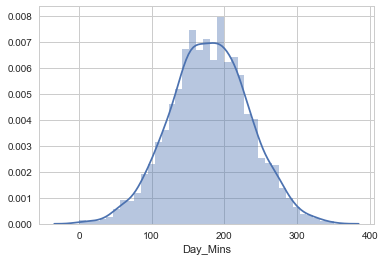

In [292]:
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])
# Display the plot
plt.show()

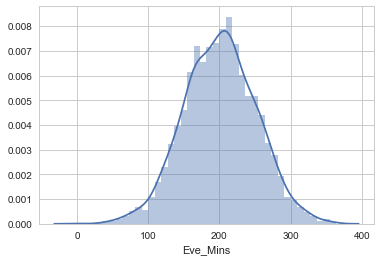

In [293]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])
# Display the plot
plt.show()

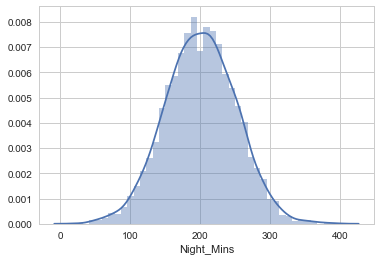

In [294]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])
# Display the plot
plt.show()

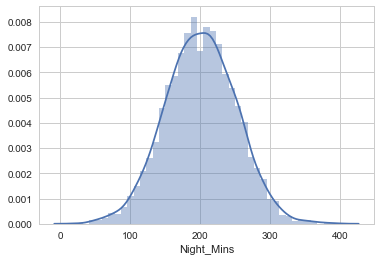

In [295]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Night_Mins'])
# Display the plot
plt.show()

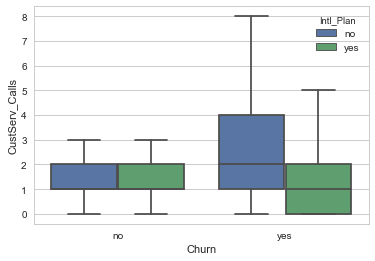

In [296]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

In [297]:
cols=['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']

In [298]:
telco[cols].corr()

,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,Day_Charge,Eve_Charge,Night_Charge,Intl_Charge
Day_Mins,1.000000,0.007043,0.004323,-0.010155,1.000000,0.007029,0.004300,-0.010092
Eve_Mins,0.007043,1.000000,-0.012584,-0.011035,0.007050,1.000000,-0.012593,-0.011067
Night_Mins,0.004323,-0.012584,1.000000,-0.015207,0.004324,-0.012592,0.999999,-0.015180
Intl_Mins,-0.010155,-0.011035,-0.015207,1.000000,-0.010157,-0.011043,-0.015214,0.999993
Day_Charge,1.000000,0.007050,0.004324,-0.010157,1.000000,0.007036,0.004301,-0.010094
Eve_Charge,0.007029,1.000000,-0.012592,-0.011043,0.007036,1.000000,-0.012601,-0.011074
Night_Charge,0.004300,-0.012593,0.999999,-0.015214,0.004301,-0.012601,1.000000,-0.015186
Intl_Charge,-0.010092,-0.011067,-0.015180,0.999993,-0.010094,-0.011074,-0.015186,1.000000


Note: Day_Charge vs Day_Mins, Eve_Mins vs Eve_Charge, Night_Mins vs Night_Charge, Intl_Mins vs Intl_Charge have correlation coefficient of 1

# Feature engineering/selection

- Feature engineering

In [299]:
# Create the new features
telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']
telco['Eve_Cost'] = telco['Eve_Mins'] / telco['Eve_Charge']
telco['Night_Cost'] = telco['Night_Mins'] / telco['Night_Charge']
telco['Intl_Cost'] = telco['Intl_Mins'] / telco['Intl_Charge']

telco['Avg_Day_Calls'] = telco['Day_Mins'] / telco['Day_Calls']
telco['Avg_Eve_Calls'] = telco['Eve_Mins'] / telco['Eve_Calls']
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']
telco['Avg_Intl_Calls'] = telco['Intl_Mins'] / telco['Intl_Calls']

## Drop redundant features
##redun=['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge','Day_Calls', 'Eve_Calls','Night_Calls', 'Intl_Calls']
##telco= telco.drop(telco[redun], axis=1)

print(telco.head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn Intl_Plan Vmail_Plan  Day_Calls  Day_Charge  \
0               1    no        no        yes        110       45.07   
1               1    no        no        yes        123       27.47   
2               0    no        no         no        114       41.38   
3               2    no       yes         no         71       50.90   
4               3    no       yes         no        113       28.34   

   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \
0         99      

- Encoding binary features

In [300]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'yes':1, 'no':0})
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'yes':1, 'no':0})
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'yes':1, 'no':0})

- One hot encoding of the 'state' feature

In [301]:
# Perform one hot encoding on 'State'
telco_state_temp = pd.get_dummies(telco['State'])

# get dummy for these categorical features
telco_state = pd.concat((telco.drop(['State'], axis=1), telco_state_temp.astype(int)), axis=1)
print(telco_state.head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls  Churn  Intl_Plan  Vmail_Plan  Day_Calls  Day_Charge  \
0               1      0          0           1        110       45.07   
1               1      0          0           1        123       27.47   
2               0      0          0           0        114       41.38   
3               2      0          1           0         71       50.90   
4               3      0          1           0        113       28.34   

   Eve_Calls  Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  Intl_Charge  \


- Drop unnecessary features


In [302]:
# Drop the unnecessary features
telco_state = telco_state.drop(telco_state[['Area_Code','Phone']], axis=1)

In [303]:
telco_state.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,5.881961,11.764005,22.225250,3.703704,2.410000,1.993939,2.689011,3.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,5.882781,11.762936,22.218341,3.702703,1.313821,1.898058,2.469903,4.566667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,5.882069,11.766990,22.213115,3.708207,2.135088,1.101818,1.563462,2.440000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,5.882122,11.768061,22.223476,3.707865,4.216901,0.703409,2.212360,0.942857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,5.882145,11.760508,22.223543,3.699634,1.475221,1.215574,1.544628,3.366667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [304]:
telco_state.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Day_Cost', 'Eve_Cost',
       'Night_Cost', 'Intl_Cost', 'Avg_Day_Calls', 'Avg_Eve_Calls',
       'Avg_Night_Calls', 'Avg_Intl_Calls', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

# Normalization of numerical features

In [305]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Day_Cost', 'Eve_Cost',
       'Night_Cost', 'Intl_Cost', 'Avg_Day_Calls', 'Avg_Eve_Calls',
       'Avg_Night_Calls', 'Avg_Intl_Calls']
telco_state[cols_to_norm] = MinMaxScaler().fit_transform(telco_state[cols_to_norm])

In [306]:
telco_state.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Day_Cost,Eve_Cost,Night_Cost,Intl_Cost,Avg_Day_Calls,Avg_Eve_Calls,Avg_Night_Calls,Avg_Intl_Calls,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.524793,0.490196,0.755701,0.542755,0.595750,0.500,0.111111,0,0,1,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.389377,0.501007,0.411984,0.595960,0.331512,0.112319,0.356914,0.173309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.438017,0.509804,0.460661,0.537531,0.621840,0.685,0.111111,0,0,1,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.407830,0.445350,0.362705,0.579853,0.179271,0.106067,0.325144,0.241891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.561983,0.000000,0.693843,0.333242,0.374933,0.610,0.000000,0,0,0,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.391791,0.656512,0.325432,0.668417,0.293331,0.054151,0.193715,0.123633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.342975,0.000000,0.853478,0.170195,0.467187,0.330,0.222222,0,1,0,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.392988,0.712272,0.399335,0.662921,0.582459,0.028174,0.287802,0.040381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.305785,0.000000,0.475200,0.407754,0.440290,0.505,0.333333,0,1,0,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.393518,0.318849,0.399814,0.530470,0.201687,0.061568,0.190984,0.175162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [308]:
telco_state.isnull().sum()
telco_state.dropna(inplace=True)
telco_state.shape

(3312, 77)

# Preparing Training and Testing test using SMOTE

In [311]:
# Generating training set and test set
from sklearn.model_selection import train_test_split
# Create feature variable
X = telco_state.drop('Churn', axis=1)
# Create target variable
y = telco_state['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [312]:
from imblearn.over_sampling import SMOTE

print("Initial shape of train_X: {}".format(X_train.shape))
print("Initial shape of train_y: {}".format(y_train.shape))
print("Initial counts of label '1': {}".format(sum(y_train==1)))
print("Initial counts of label '0': {}".format(sum(y_train==0)))

# dealing with imbalanced data
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

print("After OverSampling, the shape of train_X: {}".format(X_train.shape))
print("After OverSampling, the shape of train_y: {}".format(y_train.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Initial shape of train_X: (2649, 76)
Initial shape of train_y: (2649,)
Initial counts of label '1': 367
Initial counts of label '0': 2282
After OverSampling, the shape of train_X: (4564, 76)
After OverSampling, the shape of train_y: (4564,)
After OverSampling, counts of label '1': 2282
After OverSampling, counts of label '0': 2282


# Modeling

In [347]:
# function to report performance
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_recall_curve,confusion_matrix
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from time import time
def report_performance(clf, X_train, y_train, X_test, y_test, name):
    
    #beta=0.5  # To give more weight to the Precision
    y_pred=clf.predict(X_test)   
    cnf_matrix = confusion_matrix(y_test, y_pred)
    TP = cnf_matrix[0][0]
    FP = cnf_matrix[0][1]  
    TN = cnf_matrix[1][1] 
    FN = cnf_matrix[1][0]
    precision = round(float(TP) / float(TP + FP), 3)
    recall = round(float(TP) /float(TP + FN), 3)
    accuracy= round(float(TP + TN ) /float(TP + TN + FP + FN), 3)
    f1score = round(f1_score(y_test, y_pred), 3)  
    fbscore = round(fbeta_score(y_test, y_pred, 0.5), 3) # beta=0.5
    fb2score = round(fbeta_score(y_test, y_pred, 2), 3)
    print("Accuracy:" + str(accuracy))
    #print(clf.score(X_test, y_test))
    print("Precision:" + str(precision))
    print("Recall:" + str(recall))
    print("F1_score:"+ str(f1score))
    print("Fbeta_0.5_score:"+ str(fbscore))
    print("Fbeta_2_score:"+ str(fb2score))

    y_pred_prob = clf.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    print("PR_AUC:"+str(round(pr_auc,2)))
    
    #print(classification_report(y_test, y_pred))
    # create plot
    plt.plot(precision, recall, label=name)
    _ = plt.xlabel('Precision')
    _ = plt.ylabel('Recall')
    _ = plt.title('Precision-recall curve')
    _ = plt.legend(loc="lower left")    


In [427]:
# function to plot ROC
from sklearn.metrics import roc_auc_score

def plot_roc(clf, X_train, y_train, X_test, y_test, name):   
    # Generate the probabilities
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    # Import roc_curve
    from sklearn.metrics import roc_curve

    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=name)
    # Print the AUC
    print("Area under the curve: "+ str(round(roc_auc_score(y_test, y_pred_prob),2)))
    # Add labels and diagonal line
    _ = plt.xlabel("False Positive Rate")
    _ = plt.ylabel("True Positive Rate")
    _ = plt.title('ROC')
    _ = plt.plot([0, 1], [0, 1], "k--")
    _ = plt.legend(loc="lower left")
    #plt.show()

- Loop oever different Classifiers

Model perfomance with: LogisticRegression
Accuracy:0.774
Precision:0.779
Recall:0.936
F1_score:0.534
Fbeta_0.5_score:0.456
Fbeta_2_score:0.645
PR_AUC:0.58


Model perfomance with: KNN
Accuracy:0.774
Precision:0.805
Recall:0.911
F1_score:0.49
Fbeta_0.5_score:0.433
Fbeta_2_score:0.563
PR_AUC:0.45


Model perfomance with: AdaBoost
Accuracy:0.913
Precision:0.949
Recall:0.945
F1_score:0.746
Fbeta_0.5_score:0.75
Fbeta_2_score:0.742
PR_AUC:0.76


Model perfomance with: RandomForest
Accuracy:0.863
Precision:0.903
Recall:0.929
F1_score:0.629
Fbeta_0.5_score:0.606
Fbeta_2_score:0.653
PR_AUC:0.61


Model perfomance with: GradientBoosting
Accuracy:0.929
Precision:0.958
Recall:0.956
F1_score:0.795
Fbeta_0.5_score:0.797
Fbeta_2_score:0.793
PR_AUC:0.86




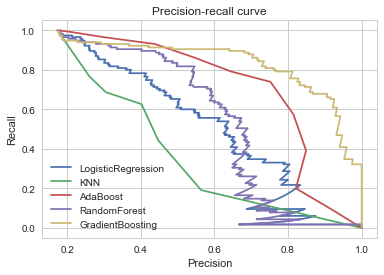

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ests = [ LogisticRegression(random_state=123),
        KNeighborsClassifier(),
        RandomForestClassifier(random_state=123),
        AdaBoostClassifier(random_state=123),
        GradientBoostingClassifier(random_state=123)]

ests_labels = np.array(['LogisticRegression', 'KNN', 'AdaBoost', 'RandomForest', 'GradientBoosting'])
errvals = np.array([])

i=0
for e in ests:
    c=e.fit(X_train, y_train)
    print ("Model perfomance with: {:s}".format(ests_labels[i]))
    report_performance(c, X_train, y_train, X_test, y_test, ests_labels[i] )
    print ("\n")    
    i+=1

    

Model perfomance with: LogisticRegression
Area under the curve: 0.83


Model perfomance with: KNN
Area under the curve: 0.73


Model perfomance with: AdaBoost
Area under the curve: 0.92


Model perfomance with: RandomForest
Area under the curve: 0.87


Model perfomance with: GradientBoosting
Area under the curve: 0.92




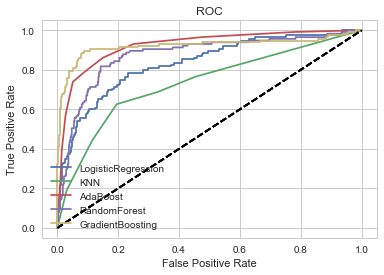

In [428]:
i=0    
for e in ests:
    c=e.fit(X_train, y_train)
    print ("Model perfomance with: {:s}".format(ests_labels[i]))
    plot_roc(c, X_train, y_train, X_test, y_test, ests_labels[i] ) 
    print ("\n")
    i+=1

# Tuning the model

- GradientBoostingClassifier + GridSearchCV

In [421]:
from sklearn.model_selection import GridSearchCV


clf=GradientBoostingClassifier(random_state=123)

# Create the hyperparameter grid
n_est=300
param_grid = {
    "n_estimators": [ n_est ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 0.2 ], 
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
}

# Call GridSearchCV
grid_search_gb = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Print best parameters
print("best parameters: ", grid_search_gb.best_params_)

best parameters:  {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 0.2, 'n_estimators': 300}


- RandomForestClassifier + GridSearchCV

In [420]:
from sklearn.model_selection import GridSearchCV


clf=RandomForestClassifier(random_state=123)

# Create the hyperparameter grid
n_est=300
param_grid = { "n_estimators": [ n_est ],
               "max_depth":[3,5,8],
            "min_samples_split" : [ 0.2 ], 
               "max_features":["log2","sqrt"],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search_rf = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print best parameters
print("best parameters: ", grid_search_rf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 0.2, 'n_estimators': 300}


# Feature importances

- Feature importance from GradientBoostingClassifier + GridSearchCV

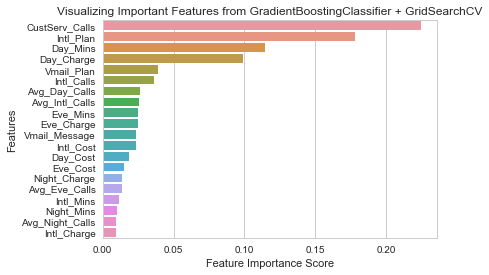

<Figure size 360x360 with 0 Axes>

In [422]:
feature_imp_gb = pd.Series(grid_search_gb.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_gb[:20], y=feature_imp_gb[:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from GradientBoostingClassifier + GridSearchCV")
plt.figure(figsize=(5,5))
plt.show()

In [423]:
# show important features
feature_imp_gb[:5]

CustServ_Calls    0.224758
Intl_Plan         0.178096
Day_Mins          0.114732
Day_Charge        0.099066
Vmail_Plan        0.039271
dtype: float64

Feature importance from RandomForestClassifier + GridSearchCV

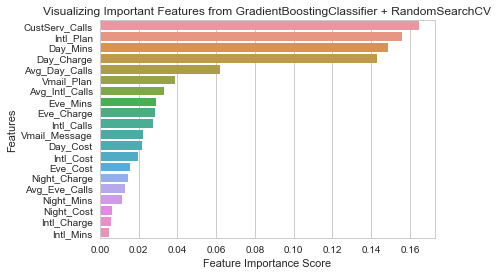

<Figure size 360x360 with 0 Axes>

In [424]:
feature_imp_rf = pd.Series(grid_search_rf.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_rf[:20], y=feature_imp_rf[:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from GradientBoostingClassifier + RandomSearchCV")
plt.figure(figsize=(5,5))
plt.show()

In [425]:
# show important features
feature_imp_rf[:5]

CustServ_Calls    0.164496
Intl_Plan         0.155829
Day_Mins          0.148718
Day_Charge        0.142891
Avg_Day_Calls     0.061953
dtype: float64

# Summary

- Before creating the churn model, the exploratory data analysis, features engineering and selection were performed. 
- Several models were created based on different classifiers, where the minority data in the training set was oversampled using SMOTE so that there were same amount of positive and negative target data. 
- The performance of each models was evaluated based on as accuracy, precision and recall, ROC, and P-R curve metrics. As these are imbalanced data, using precision, recall, and P-R curve would be more meaningful.
- Model tuning was applied on the GradientBoosting and RandomForest using GridSearchCV. The feature importances provided from the best estimators of both optimized models show the same top 4 features, indicating that CustServ_Calls, Intl_Plan, Day_Mins, Day_Charge, Avg_Day_Calls, and Vmail_Plan would be critical to predict customer churning.